In [312]:
import requests
import json
import datetime
import pandas as pd

In [313]:
# gist

'''
For every refdes

    For every stream

        For every day since start day until now

            Request day of refdes + stream + pd7

                If data in response

                    Append refdes + stream + first time stamp within day to data frame

                Else request next day

Drop stream from data frame and collapse refdes into single entry per day with data

Plot time series

'''


'\nFor every refdes\n\n    For every stream\n\n        For every day since start day until now\n\n            Request day of refdes + stream + pd7\n\n                If data in response\n\n                    Append refdes + stream + first time stamp within day to data frame\n\n                Else request next day\n\nDrop stream from data frame and collapse refdes into single entry per day with data\n\nPlot time series\n\n'

In [314]:
'''
TODO - remove when multiple stream and collapse by day
'''

'\nTODO - remove when multiple stream and collapse by day\n'

In [315]:
USERNAME ='OOIAPI-9N9UMLHV9W5GOP'
TOKEN= 'SJN6HXHH116OZ8'

In [316]:
# define your inputs and starting time

refdes_streams = '/Users/knuth/Documents/ooi/repos/github/ooi_stats/botpt_streams.csv'
begin_time_set = datetime.date(2016, 7, 10)

In [317]:
# wrangling

# request only parameter 7 (time)
parameter = '7' 

# read in csv (for now)
refdes_streams_df = pd.read_csv(refdes_streams, parse_dates=True) # read in csv (for now).

# prepare time stamp converters
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

# create some empty lists as inputs for your final data frame output
ref_des_list = []
stream_list = []
timestamp_list = []

In [319]:
%%time

# interate over reference designators, delivery methods and streams

for index, row in refdes_streams_df.iterrows():
    ref_des =  row['ref_des']
    stream = row['stream']
    delivery_method = row['delivery_method']
    
    begin_time = begin_time_set
    begin_time_str = begin_time.strftime('%Y-%m-%dT%H:%M:%S.000Z')
    end_time = begin_time + datetime.timedelta(seconds=86400)
    end_time_str = end_time.strftime('%Y-%m-%dT%H:%M:%S.000Z')

    # print ref_des,stream,delivery_method
    
    # while begin_time < datetime.datetime.now().date(): # use this to run from begin time until present
    for i in range(5): # use for testing
        
        try:        
            response = requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'+ref_des[:8]+'/'+ref_des[9:14]+'/'+ref_des[15:27]+'/'+delivery_method+'/'+stream+'?beginDT='+begin_time_str+'&endDT='+end_time_str+'&limit=1000&parameters='+parameter, auth=(USERNAME, TOKEN))
            data = response.json()
            timestamp = data[0]['time']
            timestamp = datetime.datetime.utcfromtimestamp(timestamp - ntp_delta).replace(microsecond=0)
            timestamp = timestamp.date()

            # print timestamp

            ref_des_list.append(ref_des)
            stream_list.append(stream)
            timestamp_list.append(timestamp)

        except:
            data = response.json()
            # print "\n From", begin_time_str, end_time_str, ":"
            # print data['status']


        # move to next day
        begin_time = begin_time + datetime.timedelta(seconds=86400)
        begin_time_str = begin_time.strftime('%Y-%m-%dT%H:%M:%S.000Z')
        end_time = end_time + datetime.timedelta(seconds=86400)
        end_time_str = end_time.strftime('%Y-%m-%dT%H:%M:%S.000Z')


CPU times: user 2.47 s, sys: 121 ms, total: 2.59 s
Wall time: 1min 20s


In [282]:
# convert lists to data frame
data_dict = {
    'refdes':ref_des_list,
    'stream':stream_list,
    'timestamp':timestamp_list}
ooi_data = pd.DataFrame(data_dict, columns = ['refdes', 'stream', 'timestamp'])
print ooi_data.head()

                        refdes             stream   timestamp
0  RS03CCAL-MJ03F-05-BOTPTA301  botpt_heat_sample  2016-07-09
1  RS03CCAL-MJ03F-05-BOTPTA301  botpt_heat_sample  2016-07-10
2  RS03CCAL-MJ03F-05-BOTPTA301  botpt_heat_sample  2016-07-12
3  RS03CCAL-MJ03F-05-BOTPTA301  botpt_heat_sample  2016-07-12
4  RS03CCAL-MJ03F-05-BOTPTA301  botpt_heat_sample  2016-07-13


In [301]:
# collapse by unique ref_des and day with data
test = ooi_data
test = test.drop('stream', axis = 1)
test = test.drop_duplicates()

In [302]:
ooi_data.head()

,refdes,stream,timestamp
0,RS03CCAL-MJ03F-05-BOTPTA301,botpt_heat_sample,2016-07-09
1,RS03CCAL-MJ03F-05-BOTPTA301,botpt_heat_sample,2016-07-10
2,RS03CCAL-MJ03F-05-BOTPTA301,botpt_heat_sample,2016-07-12
3,RS03CCAL-MJ03F-05-BOTPTA301,botpt_heat_sample,2016-07-12
4,RS03CCAL-MJ03F-05-BOTPTA301,botpt_heat_sample,2016-07-13


In [303]:
test.head()

,refdes,timestamp
0,RS03CCAL-MJ03F-05-BOTPTA301,2016-07-09
1,RS03CCAL-MJ03F-05-BOTPTA301,2016-07-10
2,RS03CCAL-MJ03F-05-BOTPTA301,2016-07-12
4,RS03CCAL-MJ03F-05-BOTPTA301,2016-07-13
5,RS03CCAL-MJ03F-05-BOTPTA301,2016-07-15


In [304]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [320]:
for index, row in test.iterrows():
    StartTime = row['timestamp']
    EndTime = row['timestamp'] + datetime.timedelta(seconds=86400)
    stream_time = np.array([StartTime,EndTime])
    stream_shape = np.full((stream_time.shape), 1)
    plt.plot(stream_time, stream_shape, linewidth=10, color='blue')

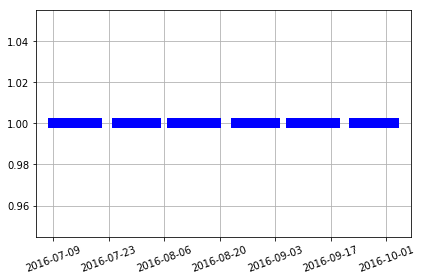

In [321]:
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()